# Hands-on LH2: the multijunction launcher

A tokamak a intrinsequally a pulsed machine. In order to perform long plasma discharges, it is necessary to drive a part of the plasma current, in order to limit (or ideally cancel) the magnetic flux consumption. Additional current drive systems are used for these. Among the current drive systems, _Lower Hybrid Current Drive_ (LHCD) systems have demonstrated the larger current drive efficiency. 

A Lower Hybrid launcher is generally made of numerous waveguides, stacked next to each other by their large sides. Since there is a phase shift between each waveguide in the toroidal direction, these launchers constitute a _phased array_. A phased array is an array of radiating elements in which the relative phases of the respective signals feeding these elements are varied in such a way that the effective radiation pattern of the array is reinforced in a desired direction and suppressed in undesired directions. A phased array is an example of N-slit diffraction. It may also be viewed as the coherent addition of N sources. In the case of LHCD launchers, the RF power is transmitted into a specific direction in the plasma through plasma waves. These waves will ultimately drive some additional plasma current in the tokamak.

The total number of waveguides in a LHCD launcher increased with each launcher generation. From simple structures, made of two or four waveguides, today's LHCD launchers such as the Tore Supra ones have hundred of waveguides. With such a number of waveguides, it is not possible anymore to excite each waveguides separately. _Multijunctions_ have been designed to solve this challenge. They act as a power splitter while phasing the adjacent waveguides.

The aim of this hands-on is to measure and characterize the RF performances of a multijunction structure, on a real Tore Supra C3 mock-up. From these relative measurements, you will have to analyse the performances of the multijunction and to deduce if the manufacturing tolerances affect them. 


Before or in parallel to making measurements, you will have to calculate what would be the ideal spectral power density (or _spectrum_) launched by such a multijunction. This will serve them for making comparison theory vs experimental and thus discuss about the performances one could expect. 

## 1. LHCD launcher spectrum

The objective of this section is to get you to understand the multiple requirements of a LHCD launcher. 

## 2. RF Measurements

Because of the non-standard dimensions of the waveguides, it is not possible to use commercial calibration toolkit, and thus to make an 
precise and absolute calibration of the RF measurements. However, relative comparisons are still relevant. 


-----

# Solution 

This notebook illustrates a method to compute the power density spectrum of a phased array. 

In [1]:
%pylab
%matplotlib inline
from scipy.constants import c

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Phased array geometry

A linear phased array with equal spaced elements is easiest to analyze. It is illustrated in the following figure, in which radiating elements are located at a $\Delta z$ distance between each other. These elements radiates with a phase shift $\Delta \Phi$.  

Let's a rectangular waveguide phased array facing the plasma. The waveguides periodicity is $\Delta z=b+e$ where $b$ is the width of a waveguide and $e$ the thickness of the septum between waveguides and the phase shift between waveguides is $\Delta \Phi$. We will suppose here that the amplitude and the phase of the waves in a waveguide do not depend of the spatial direction $z$. Thus we have $\Delta\Phi=$. The geometry is illustrated in the figure below.  

<img src="./LH2_Multijunction_data/phased_array_grill.png"> 

## Ideal grill

Let's make the hypothesis that the electric field at the interface antenna-plasma is not perturbed from the electric field in the waveguide. At the antenna-plasma interface, the total electric field is thus:   

$$ E(z) = \sum_{n=1}^N E_n \Pi_n(z) = \sum_{n=1}^N A_n e^{j\Phi_n} \Pi_n(z) $$

where $\Pi_n(z)$ is a Heavisyde step function, equals to unity for $z$ corresponding to a waveguide $n$, and zero elsewhere. The power density spectrum is homogeneous to the square of the Fourier transform of the electric field, that is, to :

$$ \tilde{E}(k_z) = \int E(z) e^{j k_z z} \, dz $$

Where $k_z=n_z k_0$. If one calculates the modulus square of the previous expression, this should give:

$$ dP(n_z) \propto sinc^2 \left( k_0 n_z \frac{b}{2} \right) \left( \frac{\sin(N \Phi/2)}{\sin\Phi/2} \right)^2 $$

With $\Phi=k_0 n_z \Delta z + \Delta\Phi$. The previous expression is maximized for $\Phi=2 p \pi, p\in \mathbb{N}$. Assuming $p=0$, this leads to the condition :

$$ n_{z0} = - \frac{\Delta\Phi}{k_0 \Delta z} $$

Let's define the following function:

In [2]:
def ideal_spectrum(b,e,phi,N=6,f=3.7e9):
    nz = np.arange(-10,10,0.1)
    k0 = (2*pi*f)/c
    
    PHI = k0*nz*(b+e) + phi
    dP = sinc(k0*nz*b/2)*(sin(N*PHI/2)/sin(PHI/2))**2
    
    return(nz,dP)

And trace the spectrum of an ideal launcher:

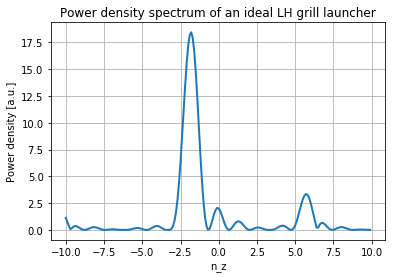

In [3]:
nz, dP_ideal = ideal_spectrum(b=8e-3, e=2e-3, phi=pi/2, N=6)


plot(nz, abs(dP_ideal), lw=2)
xlabel('n_z');
ylabel('Power density [a.u.]');
title('Power density spectrum of an ideal LH grill launcher') 
grid('on')


## Realistic grill

Let's illustrate this with a more realistic case. Below we define a function that generate the electric field along z for N waveguides, d-spaced and with a constant phase shift. The spacial precision can be set optionnaly.   

In [4]:
def generate_Efield(b,e,phi,N=6,dz=1e-4,A=1):
    # generate the z-axis, between [z_min, z_max[ by dz steps
    z_min = 0 - 0.01
    z_max = N*(b+e) + 0.01
    z = arange(z_min, z_max, dz)
    # construct the Efield (complex valued)
    E = zeros_like(z,dtype=complex)
    for idx in arange(N):
        E[ (z>=idx*(b+e)) & (z < idx*(b+e)+b) ] = A * exp(1j*idx*phi)
    return(z,E)

Then we use this function to generate the electric field at the mouth of a 6 waveguide launcher, of waveguide width b=8mm, septum thickness e=2mm with a phase shift between waveguides of 90° ($\pi/2$) :

In [5]:
z,E = generate_Efield(b=8e-3, e=2e-3,phi=pi/2)

(-200, 200)

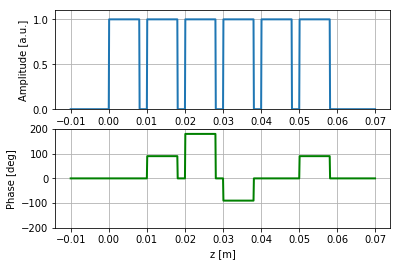

In [6]:
subplot(211)
plot(z,abs(E), lw=2)
ylabel('Amplitude [a.u.]')
grid('on')
ylim((0,1.1))

subplot(212)
plot(z,angle(E)*180/pi,'g', lw=2)
xlabel('z [m]')
ylabel('Phase [deg]')
grid('on')
ylim((-200, 200))

Now, let's take the fourier transform of such a field (the source frequency is here f=3.7 GHz, the frequency of the Tore Supra LH system).

In [7]:
def calculate_spectrum(z,E,f=3.7e9):
    k0 = 2*pi*f/c
    lambda0 = c/f
    # fourier domain points
    B = 2**18
    Efft = np.fft.fftshift(np.fft.fft(E,B))
    
    # fourier domain bins
    dz = z[1] - z[0] # assumes spatial period is constant
    df = 1/(B*dz)
    K = arange(-B/2,+B/2)
    # spatial frequency bins
    Fz= K*df
    # parallel index is kz/k0
    nz= (2*pi/k0)*Fz
    
    # ~ power density spectrum
    p = (dz)**2/lambda0 * (1/2*Efft*conj(Efft));
    
    return(nz,p)

In [8]:
nz,p = calculate_spectrum(z,E)

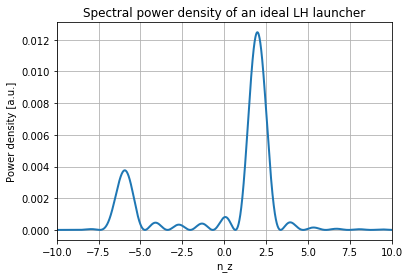

In [9]:
plot(nz,real(p),lw=2)
xlim((-10,10))
xlabel('n_z')
ylabel('Power density [a.u.]') 
title('Spectral power density of an ideal LH launcher')
grid('on')

The main component of the spectrum seems located near $n_z$=2. Looking at the previous analytical formula, which expresses the extremum of the power density spectrum:

In [10]:
f = 3.7e9 # frequency [Hz]
b = 8e-3 # waveguide width [m]
e = 2e-3 # septum width [m]
k0 = (2*pi*f) / c # wavenumber in vacuum
delta_phi = pi/2 # phase shift between waveguides

$$n_{z0} = \frac{k_{z0}}{k_0} = \frac{\Delta \Phi}{k_0 \Delta z }$$

In [11]:
nz0 = pi/2 / ((b+e) * k0) # main component of the spectrum

In [12]:
nz0

2.025624716216216

Which is what we expected from the previous Figure.

## Current Drive Direction
Let's assume that the plasma current is clockwise as seen from the top of a tokamak. Let's also define the positive direction of the toroidal magnetic field being in the same direction than the plasma current, i.e. :
$$
\mathbf{B}_0 = B_0 \mathbf{e}_\parallel
$$
and
$$
\mathbf{I}_p = I_p \mathbf{e}_\parallel
$$

Let be $\mathbf{J}_{LH}$ the current density created by the Lower Hybrid system. The current density is expressed as
$$
\mathbf{J}_{LH} = - n e v_\parallel \mathbf{e}_\parallel
$$
where $v_\parallel=c/n_\parallel$. As we want the current driven to be in the same direction than the plasma current, i.e.:
$$
\mathbf{J}_{LH}\cdot\mathbf{I}_p > 0
$$
one must have :
$$
n_\parallel < 0
$$

## RF Measurements of the multijunction

In [13]:
import numpy as np

In [14]:
calibration = np.loadtxt('LH2_Multijunction_data/calibration.s2p', skiprows=5)
fwd1 = np.loadtxt('LH2_Multijunction_data/fwd1.s2p', skiprows=5)
fwd2 = np.loadtxt('LH2_Multijunction_data/fwd2.s2p', skiprows=5)
fwd3 = np.loadtxt('LH2_Multijunction_data/fwd3.s2p', skiprows=5)
fwd4 = np.loadtxt('LH2_Multijunction_data/fwd4.s2p', skiprows=5)
fwd5 = np.loadtxt('LH2_Multijunction_data/fwd5.s2p', skiprows=5)
fwd6 = np.loadtxt('LH2_Multijunction_data/fwd6.s2p', skiprows=5)
f = calibration[:,0]
S21_cal = calibration[:,3]

Text(0.5,0,'f [GHz]')

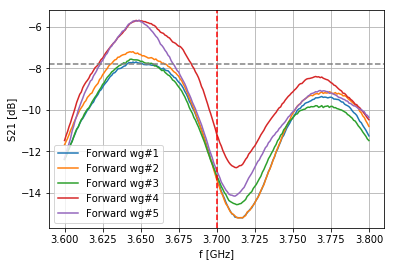

In [15]:
fig, ax = plt.subplots()
ax.plot(f/1e9, fwd1[:,3]-S21_cal)
ax.plot(f/1e9, fwd2[:,3]-S21_cal)
ax.plot(f/1e9, fwd3[:,3]-S21_cal)
ax.plot(f/1e9, fwd4[:,3]-S21_cal)
ax.plot(f/1e9, fwd5[:,3]-S21_cal)
#ax.plot(f/1e9, fwd6[:,3]-S21_cal)
ax.legend(('Forward wg#1', 'Forward wg#2','Forward wg#3','Forward wg#4','Forward wg#5'))
ax.grid(True)
ax.axvline(3.7, color='r', ls='--')
ax.axhline(10*np.log10(1/6), color='gray', ls='--')
ax.set_ylabel('S21 [dB]')
ax.set_xlabel('f [GHz]')

In [78]:
fwds = [fwd1, fwd2, fwd3, fwd4, fwd5, fwd6]
s21 = []

for fwd in fwds:
    s21.append(10**((fwd[:,3]-S21_cal)/20) * np.exp(1j*fwd[:,4]*np.pi/180))
s21 = np.asarray(s21)

In [89]:
# find the 3.7 GHz point
idx = np.argwhere(f == 3.7e9)
s21_3dot7 = s21[:,idx].squeeze()

<Container object of 6 artists>

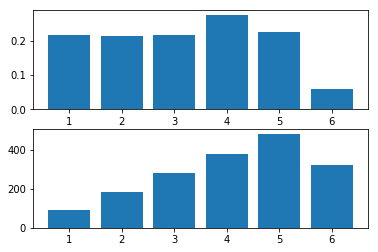

In [87]:
fig, ax = plt.subplots(nrows=2)
ax[0].bar(np.arange(1,7), np.abs(s21_3dot7))
ax[1].bar(np.arange(1,7), 180/np.pi*np.unwrap(np.angle(s21_3dot7)))

Clearly, the last waveguide measurements are strange...

## Checking the power conservation

Text(0.5,0,'f [GHz]')

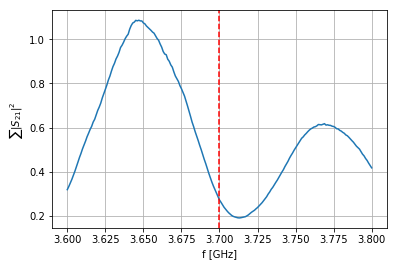

In [88]:
fig, ax = plt.subplots()
plot(f/1e9, abs(s21**2).sum(axis=0))
ax.grid(True)
ax.axvline(3.7, color='r', ls='--')
ax.set_ylabel('$\sum |S_{21}|^2$ ')
ax.set_xlabel('f [GHz]')

Clearly, the power conservation is far from being verified, because of the large incertitude of the measurement here.

### CSS Styling

In [44]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()